In [1]:
#loading libraries likely to be neccessary for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [5]:
#loading dataset and viewing it
data = pd.read_csv('marketing.csv')
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


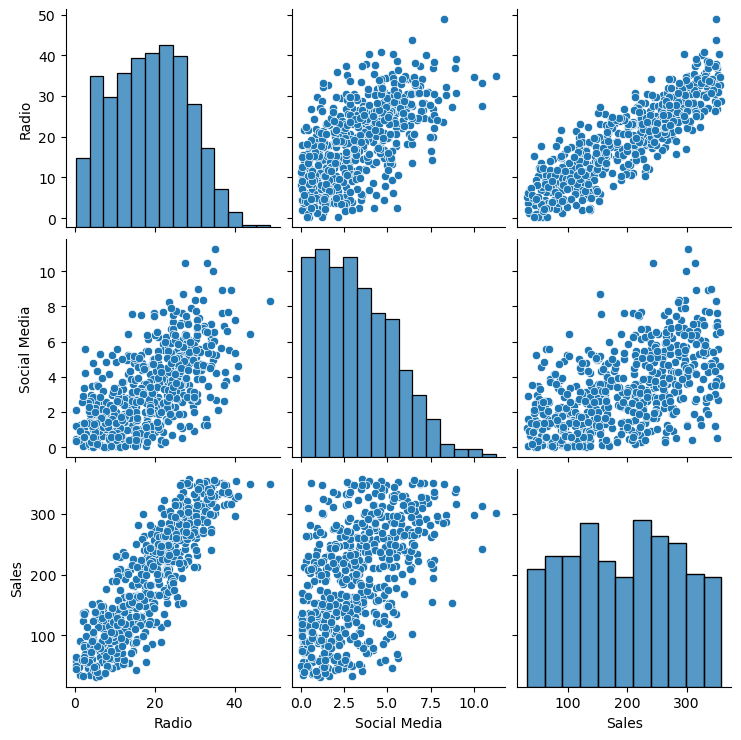

In [6]:
#columns appear to be split into categories 
#upon further analysis, TV promotional budget seperated into low, medium, high
#social media promotional budget is in millions of dollars
#radio promotional budget in millions of dollars
#sales in millions of dollars
#influencer size seperated into mega, macro, nano, and micro categories 
#creating pairwise scatter plot to visually explore relationships in data
sns.pairplot(data);

In [7]:
#radio and social media appear to have linear relationships with respect to sales
#tv and influencer are not in visual bc they are not numeric, as aforementioned
#need to figure out strategy to deal with that
#upon reflection, i decided to go with calculating the means between each category to have numeric data
#calculating means for TV categories
print(data.groupby('TV')['Sales'].mean())
print('')

TV
High      300.529591
Low        91.646843
Medium    199.023461
Name: Sales, dtype: float64



In [8]:
#calculating means for influencer categories
print(data.groupby('Influencer')['Sales'].mean())

Influencer
Macro    205.660047
Mega     180.385096
Micro    198.655080
Nano     190.777766
Name: Sales, dtype: float64


In [9]:
#average sales for high tv category is considerably higher than the other two categories
#suggests high tv is a strong predictor for sales
#the variation in influencer means are not as substantial 
#influencer as a whole might be a relatively weak predictor of sales
#will investigate further in developing regression model
#already know dataset is missing values from earlier
#aim to correct this 
data = data.dropna(axis=0)

In [10]:
#cleaning up data a bit further, particularly column headers
#i know from experience having a space in the column headers is a problem for the model
#going to correct real quick
data = data.rename(columns={'Social Media': 'Social_Media'})

In [11]:
#defining OLS model
ols_formula = 'Sales ~ C(TV) + Radio'

In [12]:
#creating model data frame
OLS = ols(formula = ols_formula, data = data)

In [13]:
#fitting the model to my data
model = OLS.fit()

In [14]:
#creating results data frame for quick access
model_results = model.summary()

In [15]:
#finally, viewing summary table 
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1782.
Date:                Mon, 10 Apr 2023   Prob (F-statistic):          1.61e-287
Time:                        05:05:28   Log-Likelihood:                -2701.4
No. Observations:                 569   AIC:                             5411.
Df Residuals:                     565   BIC:                             5428.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         217.6367      6.577     33.089      0.000     204.718     230.556
C(TV)[T.Low]     -152.0897      5.160    -29.474      0.000    -162.225    -141.954
C(TV)[T.Medium]   -73.4835      3.587    -20.484      0.000     -80.530     -66.437
Radio               2.8864      0.217     13.306      0.000       2.460       3.312
==============================================================================
Omnibus:                       35.219   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.863
Skew:                           0.087   Prob(JB):                     0.000976
Kurtosis:                       2.255   Cond. No.                         155.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 0, 'Social Media')

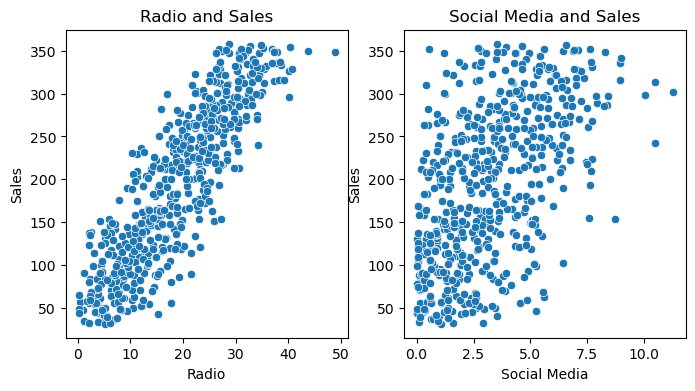

In [16]:
#as suspected, high TV promotional budget and sales have a strong relationship 
#90% of the variation in sales is explained by my multivariate model
#all variables are statistically significant 
#checking model assumptions for due dilligence purposes & extra practice 
#re-examinging some variables of interest
#checking linearity assumption through scatterplot 
fig, axes = plt.subplots(1, 2, figsize = (8,4))
#radio & sales plot
sns.scatterplot(x = data['Radio'], y = data['Sales'],ax=axes[0])
#titling
axes[0].set_title("Radio and Sales")
#social media & sales plot
sns.scatterplot(x = data['Social_Media'], y = data['Sales'],ax=axes[1])
#titiling
axes[1].set_title("Social Media and Sales")
#x-axis
axes[1].set_xlabel("Social Media")

Text(0.5, 1.0, 'Histogram of Residuals')

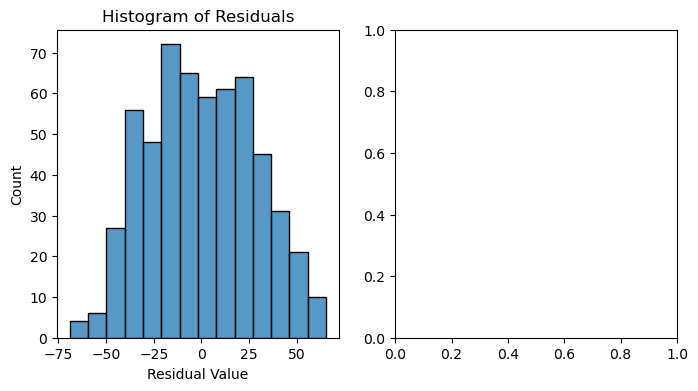

In [17]:
#although social media was not included in my initial model, it does appear to be linearly correlated
#might throw it in new model to improve performance but now that opens another can of worms with checking for multicollinearity
#will revisit this later
#going to check normality assumption next
#creating histogram with residuals from model
residuals = model.resid
fig, axes = plt.subplots(1, 2, figsize = (8,4))
sns.histplot(residuals, ax=axes[0])
#labels & title
axes[0].set_xlabel("Residual Value")
axes[0].set_title("Histogram of Residuals")

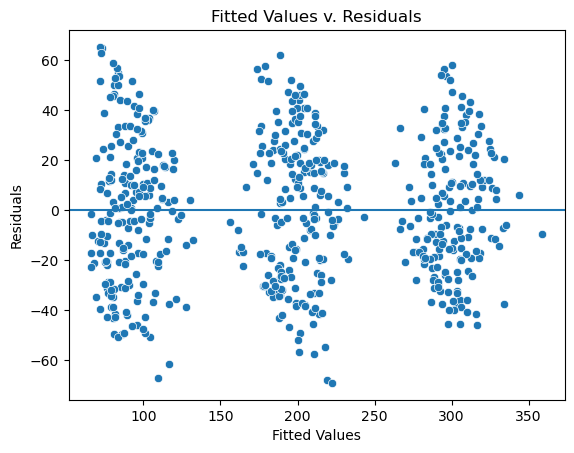

In [18]:
#normality assumption appears to check out 
#moving on to constant variance assumption
#creating scatterplot of fitted values and residuals from initial model
fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)
#labeling axis
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
#title
fig.set_title("Fitted Values v. Residuals")
#adding zero axis line
fig.axhline(0)
#displaying visual
plt.show()

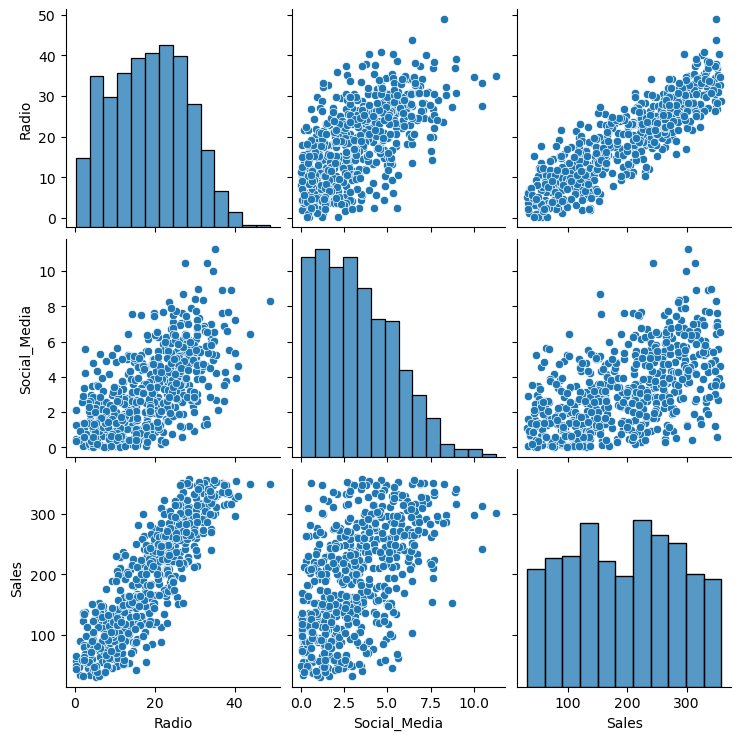

In [19]:
#admittedly, it took me a minute to understand this visual
#scatter dots are split into three seperate groups bc TV was categorical into three groups
#TV is essentially dominating the model because it is the biggest factor to determine sales, as discovered earlier
#where fitted however, variance appears to be similarly distributed
#constant variance assumption appears to check out
#revsiiting adding social media to model potentially
#need to see if there is multicollinearity in social media
#creating pairplot to visually explore
sns.pairplot(data)

In [20]:
#okay, this visual is not telling me much unfortunately
#going to have to revisit multicollinearity from a statistical perspective 
#importing variance inflation factor from statsmodels api
from statsmodels.stats.outliers_influence import variance_inflation_factor
#creating subset of data that only includes columns of interest at the moment
X = data[['Radio','Social_Media']]

In [21]:
#calculating variance inflation factor for each variable
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
#creating data frame with vif results
df_vif = pd.DataFrame(vif, index=X.columns, columns = ['VIF'])

In [22]:
#viewing results
df_vif

,VIF
Radio,4.93238
Social_Media,4.93238


In [ ]:
#VIF factor of nearly 5 indicates high multicollinearity
#cannot add social media to regression model to improve performance